<a href="https://colab.research.google.com/github/KapilNarayanSingh/ml-kapil/blob/main/Bias_Variance_Trade_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  


(-2.0, 2.0)

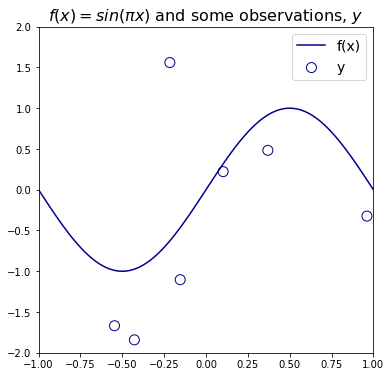

In [9]:
np.random.seed(123)
MARKER_SIZE =100
DATA_COLOR= "darkblue"
ERROR_COLOR ='darkred'
POLYNOMIAL_FIT_COLORS =['orange','royalblue','darkgreen']
LEGEND_FONTSIZE =14
TITLE_FONTSIZE =16
N_OBSERVATION =10
NOISE_STD =1

x= 2* (np.random.rand(N_OBSERVATION)-.5)
x_grid =np.linspace(-1,1,100)

def f(x):
   """Base function"""
   return np.sin(x*np.pi)


def sample_fx_data(shape,noise_std = NOISE_STD):
  return f(x) +np.random.randn(*shape)*noise_std

def plot_fx_data(y=None):
  """Plot f(x) and noisy samples"""
  y= y if y is not None else sample_fx_data(x.shape)
  fig, axs= plt.subplots(figsize=(6,6))
  plt.plot(x_grid, f(x_grid), color= DATA_COLOR, label ="f(x)")
  plt.scatter (x,y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors="none",label="y")


# Plot the data
y =sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = sin(\pi x)$ and some observations, $y$', fontsize=16)
plt.xlim([-1, 1])
plt.ylim([-2, 2])

In [3]:
x

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496])

In [4]:
y

array([ 2.20990384, -1.84107056, -1.66832743,  0.22215401,  2.4730462 ,
       -1.10346083, -0.32341389,  0.48297796,  2.0864081 ,  1.55966971])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Various Polynomial Function Fit to Observation')

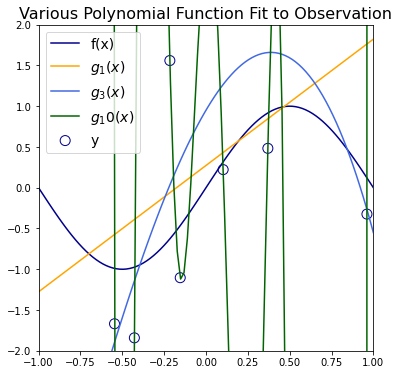

In [11]:
plot_fx_data(y)

polynomial_degrees = [1, 3, 10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
  theta[degree] = np.polyfit(x, y, degree)
  fit[degree] = np.polyval(theta[degree], x_grid)
  plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_{degree}(x)$")

plt.legend(fontsize = LEGEND_FONTSIZE )
plt.xlim([-1, 1])
plt.ylim([-2, 2]) 
plt.title("Various Polynomial Function Fit to Observation", fontsize=TITLE_FONTSIZE)

